<a href="https://colab.research.google.com/github/Edunet-Foundation/vodafone-prgm/blob/main/KNN/KNN_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameer-fice/ai-vodafone/main/datasets/Underweight-Normal.csv')
df

,Weight(x2),Height(y2),Class
0,51,167,Underweight
1,62,182,Normal
2,69,176,Normal
3,64,173,Normal
4,65,172,Normal
5,52,174,Underweight
6,58,169,Normal
7,57,173,Normal
8,55,170,Normal


In [ ]:
u_df = df[df['Class']=='Underweight']
u_df

,Weight(x2),Height(y2),Class
0,51,167,Underweight
5,52,174,Underweight


In [ ]:
n_df = df[df['Class']=='Normal']
n_df

,Weight(x2),Height(y2),Class
1,62,182,Normal
2,69,176,Normal
3,64,173,Normal
4,65,172,Normal
6,58,169,Normal
7,57,173,Normal
8,55,170,Normal


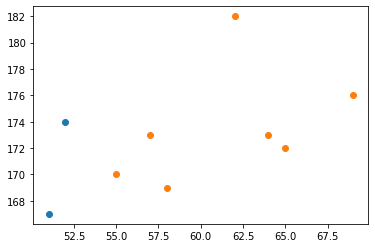

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(u_df['Weight(x2)'],u_df['Height(y2)'])
plt.scatter(n_df['Weight(x2)'],n_df['Height(y2)'])
plt.show()

In [ ]:

x =df.iloc[:,[0,1]].values
y = df.iloc[:,2].values

from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

# Changing the output to Label Encoded number

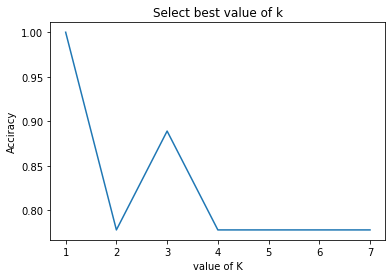

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k = range(1,8)
total_acc = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y)
    acc = knn.score(x,y)
    total_acc.append(acc)
plt.xlabel("value of K")
plt.ylabel("Acciracy")
plt.title("Select best value of k")
plt.plot(k,total_acc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [ ]:
model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
model.predict([[51,167]])

array([1])

In [ ]:
val = [57,170]
d = model.kneighbors([val])[0][0][0]
i = model.kneighbors([val])[1][0][0]
print("Distance",d)
print("Index Value",i)

Distance 1.4142135623730951
Index Value 6


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


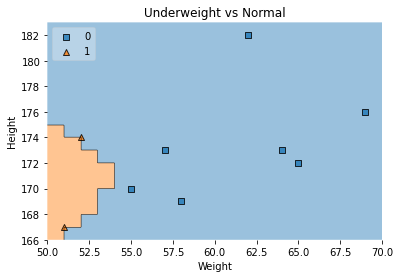

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


# Plotting decision regions
plot_decision_regions(x, y, clf=model, legend=2)

# Adding axes annotations
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Underweight vs Normal')
plt.show()